In [401]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as md
from datetime import datetime
import pylab 
import scipy.stats as stats
from sklearn.mixture import GaussianMixture

In [3]:
path = os.getcwd()
sheet_pull = pd.read_csv(os.path.join(path, 'SheetPullData.csv'))
sheet_pull[sheet_pull['Sheets'] >= 0]


,HH_ID,Roll_ID,Roll_Type,Timestamp,Time_since_last_pull,Sheets
0,A,1200,Small,2019-10-29 05:51:42,4282.0,3.991088
1,A,1200,Small,2019-10-29 06:33:27,2505.0,0.477180
2,A,1200,Small,2019-10-29 07:13:21,2394.0,4.277735
3,A,1200,Small,2019-10-29 11:10:01,14200.0,2.363388
4,A,1200,Small,2019-10-29 11:23:49,828.0,0.314410
...,...,...,...,...,...,...
12780,D,13655,Big,2020-01-13 16:34:28,3.0,5.387566
12781,D,13655,Big,2020-01-13 16:34:37,9.0,7.107592
12782,D,13655,Big,2020-01-13 16:35:19,42.0,11.417136
12783,D,13655,Big,2020-01-13 19:50:11,11692.0,7.270252


In [15]:
non_neg = sheet_pull[sheet_pull['Sheets'] >= 0]
dates = non_neg['Timestamp'].values
date = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t in dates]
event = [ord(id) - ord('A') for id in non_neg['HH_ID'].values]


SyntaxError: invalid syntax (<ipython-input-15-d7b6954f3b7e>, line 6)

In [22]:
# Split dataset by HH_ID 'A', 'B', 'C', 'D'
split = list(non_neg.groupby('HH_ID'))
id_a = split[0][1]
id_b = split[1][1]
id_c = split[2][1]
id_d = split[3][1]

Text(0, 0.5, 'Time since last pull - A')

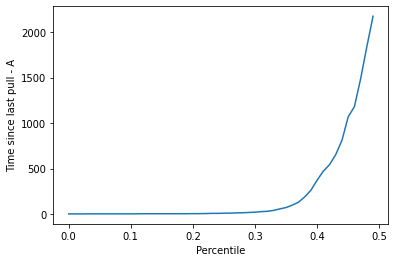

In [307]:
# Percentile Time_since_last_pull for 'A'
id_a['Time_since_last_pull'].describe()
percentiles_a = id_a['Time_since_last_pull'].quantile(np.linspace(0, 0.49, 50))
plt.plot(np.linspace(0, 0.49, 50)[:50], percentiles_a)
plt.xlabel('Percentile')
plt.ylabel('Time since last pull - A')

Text(0, 0.5, 'Time since last pull - B')

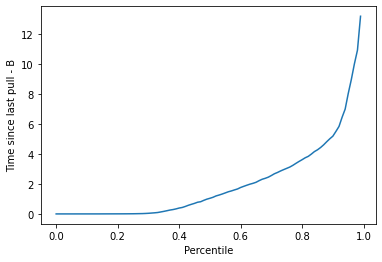

In [72]:
# Percentile Time_since_last_pull for 'B'
id_b['Time_since_last_pull'].describe()
percentiles_b = id_b['Time_since_last_pull'].quantile(np.linspace(0, 0.99, 100))
plt.plot(np.linspace(0, 0.99, 100), percentiles_b/3600)
plt.xlabel('Percentile')
plt.ylabel('Time since last pull - B')

Text(0, 0.5, 'Time since last pull - B')

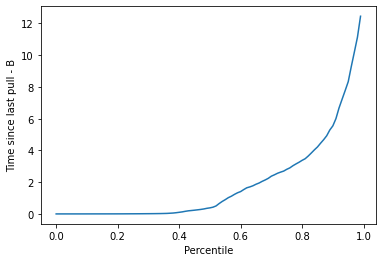

In [73]:
# Percentile Time_since_last_pull for 'C'
id_c['Time_since_last_pull'].describe()
percentiles_c = id_c['Time_since_last_pull'].quantile(np.linspace(0, 0.99, 100))
plt.plot(np.linspace(0, 0.99, 100), percentiles_c/3600)
plt.xlabel('Percentile')
plt.ylabel('Time since last pull - C')

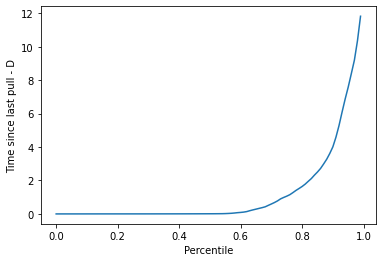

In [75]:
# Percentile Time_since_last_pull for 'D'
id_d['Time_since_last_pull'].describe()
percentiles_d = id_d['Time_since_last_pull'].quantile(np.linspace(0, 0.99, 100))
plt.plot(np.linspace(0, 0.99, 100), percentiles_d/3600)
plt.xlabel('Percentile')
plt.ylabel('Time since last pull - D')

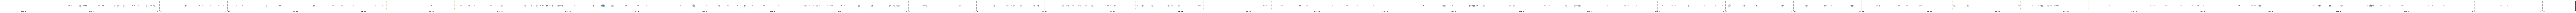

In [172]:
# Long graph showing when A pulled paper.
id_a_19 = id_a[id_a['Timestamp'].str.contains('2019')]
time = pd.to_datetime(id_a_19['Timestamp'], format = '%Y-%m-%d %H:%M:%S')

fig, ax = plt.subplots(figsize = (500, 2))
plt.scatter(time, np.ones(len(time)), s = (id_a_19['Sheets'])**1.3 * 30, alpha = 0.3)

vlines = pd.date_range(time.dt.date.min() - pd.Timedelta(1, 'd'),\
                       time.dt.date.max() + pd.Timedelta(1, 'd'))
vl_labels = vlines + pd.Timedelta(8, 'h')

for l in vlines:
    plt.axvline(x = l, color='gray', linestyle='--')

for l in vl_labels:
    plt.axvline(x = l, color='tan',  linestyle='dotted')
    
ax.set_xlim(time.min() - pd.Timedelta(1, 'd'),\
           time.max() + pd.Timedelta(1, 'd'))
ax.xaxis.set_major_locator(md.DayLocator(interval = 1))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

ax.set_yticks([])
ax.set_yticklabels([])

plt.savefig('A_shitting_pattern.png')



((array([-2.71209841, -2.40375995, -2.2281239 , -2.10241334, -2.00314327,
         -1.92040516, -1.84904323, -1.78601765, -1.72937932, -1.67780047,
         -1.63033418, -1.5862804 , -1.54510633, -1.50639667, -1.46982113,
         -1.43511253, -1.40205152, -1.37045571, -1.34017173, -1.3110693 ,
         -1.28303681, -1.25597783, -1.22980847, -1.20445525, -1.17985348,
         -1.15594581, -1.1326812 , -1.11001402, -1.08790327, -1.06631197,
         -1.04520665, -1.02455692, -1.00433508, -0.98451582, -0.96507592,
         -0.94599406, -0.92725058, -0.90882734, -0.89070751, -0.87287552,
         -0.85531685, -0.838018  , -0.82096638, -0.80415018, -0.78755836,
         -0.77118057, -0.75500707, -0.73902871, -0.72323683, -0.70762329,
         -0.69218039, -0.67690082, -0.66177768, -0.6468044 , -0.63197476,
         -0.61728281, -0.60272292, -0.5882897 , -0.573978  , -0.55978292,
         -0.54569975, -0.53172399, -0.51785133, -0.50407762, -0.49039889,
         -0.47681131, -0.4633112 , -0.

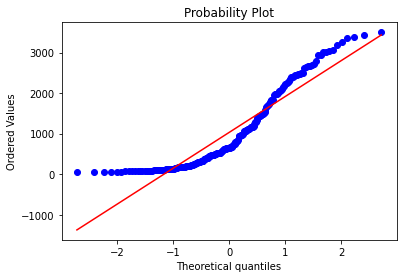

In [300]:
id_a_19[id_a_19['Time_since_last_pull'] < 600].describe()
stats.probplot(id_a[(id_a['Time_since_last_pull'] > 60) & (id_a['Time_since_last_pull'] <= 3600)]['Time_since_last_pull'].values, dist='norm', plot=pylab)

In [641]:
class SheetPullEvent:
    
    # pulls should be pandas dataFrame.
    def __init__(self, pulls):
        self.__feature_extract(pulls)

    # create task-level features
    def __feature_extract(self, pulls):
        self.time_since_last_pull = pulls['Time_since_last_pull'].values
        self.sheets = pulls['Sheets'].values
        
        self.HH_ID = pulls['HH_ID'].values[0]
        self.start_timestamp = pulls['Timestamp'].values[0]
        self.end_timestamp = pulls['Timestamp'].values[-1]
        
        self.total_duration = self.time_since_last_pull[1:].sum()
        self.total_sheets = self.sheets.sum()
        self.num_of_pulls = len(pulls.index)
        self.ave_sheets_pull = self.total_sheets / self.num_of_pulls
        self.ave_time_inbetween = self.total_duration / self.num_of_pulls
        self.max_sheets = np.amax(self.sheets)

In [642]:
# df should be pandas dataFrame
# Divide pull events into "tasks"
def group_pull_events_by_fixed(df):
    time_out = 60
    
    events = []
    pulls = []
    for i, row in df.iterrows():
        if row['Time_since_last_pull'] >= time_out:
            if not pulls:
                pulls.append(i)
            else:
                events.append(pulls)
                pulls = []
                pulls.append(i)
        
        else:
            pulls.append(i)
    
    new_df = []
    for e in events:
        new_df.append(df.loc[e])
    
    return new_df

In [643]:
# Convert list of "tasks" to SheetPullEvent objects
def grouping_to_events(grouping):
    events = []
    for g in grouping:
        events.append(SheetPullEvent(g))
    return events

In [644]:
grouping = group_pull_events_by_fixed(id_a)
events = grouping_to_events(grouping)

In [646]:
# Get features
def get_attr(events):
    total_duration = []
    total_sheets = []
    num_of_pulls = []
    ave_sheets_pull = []
    ave_time_inbetween = []
    max_sheets = []
    
    attr = []
    
    for e in events:
        attr.append([e.total_duration, e.total_sheets, e.num_of_pulls, e.ave_sheets_pull, e.ave_time_inbetween, e.max_sheets])
    
    return attr

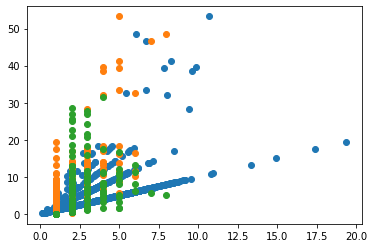

In [396]:
# 随便画的
plt.scatter(ave, total_sheet)
plt.scatter(num_pull, total_sheet)
plt.scatter(num_pull, ave_t)


In [533]:
# Fit model using Gaussian Mixture with n components
def fit_gmm(df, n):
    data = get_attr(grouping_to_events(group_pull_events_by_fixed(df)))

    gmm = GaussianMixture(n_components=n)
    gmm.fit(data)

    pre = gmm.predict(data)

    catagories = [[] for x in range(n)]
    for i in range(len(data)):
        catagories[pre[i]].append(data[i])

    catagories_t = []
    for cat in catagories:
        a = []
        b = []
        c = []
        d = []
        e = []
        f = []

        for sub_c in cat:
            a.append(sub_c[0])
            b.append(sub_c[1])
            c.append(sub_c[2])
            d.append(sub_c[3])
            e.append(sub_c[4])
            f.append(sub_c[5])
        catagories_t.append([a, b, c, d ,e, f])
    
    return gmm, catagories, catagories_t, pre


In [556]:
id_a_events = np.array(get_attr(grouping_to_events(group_pull_events_by_fixed(id_a))))
id_b_events = np.array(get_attr(grouping_to_events(group_pull_events_by_fixed(id_b))))
id_c_events = np.array(get_attr(grouping_to_events(group_pull_events_by_fixed(id_c))))
id_d_events = np.array(get_attr(grouping_to_events(group_pull_events_by_fixed(id_d))))


In [609]:
gmm, catagories, catagories_t, pre = fit_gmm(id_c, 4)

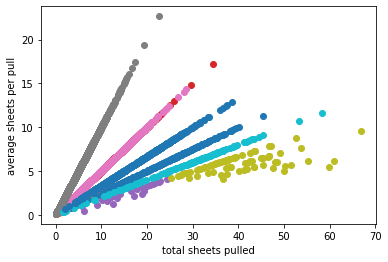

In [652]:
#     total_duration = 0
#     total_sheets = 1
#     num_of_pulls = 2
#     ave_sheets_pull = 3
#     ave_time_inbetween = 4
#     max_sheets = 5

for c in catagories_t:
    plt.scatter(c[1], c[3])
    plt.xlabel("total sheets pulled")
    plt.ylabel("average sheets per pull")

In [647]:
a_score = []
b_score = []
c_score = []
d_score = []
for n in range(1, 12):
    gmm, catagories, catagories_t, pre = fit_gmm(non_neg, n)
    a_score.append(gmm.bic(id_a_events))
    b_score.append(gmm.bic(id_b_events))
    c_score.append(gmm.bic(id_c_events))
    d_score.append(gmm.bic(id_d_events))

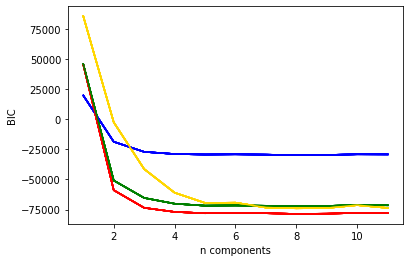

In [651]:
for n in range(1, 12):
    plt.plot(range(1, 12), a_score, c='blue')
    plt.plot(range(1, 12), b_score, c='red')
    plt.plot(range(1, 12), c_score, c='green')
    plt.plot(range(1, 12), d_score, c='gold')
    plt.xlabel("n components")
    plt.ylabel("BIC")